In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np 

In [5]:
(x_train, y_train),(x_test, y_test) = keras.datasets.mnist.load_data()

In [6]:
len(x_train)

60000

In [7]:
len(x_test)

10000

In [8]:
x_train[0].shape

(28, 28)

In [9]:
x_train[6]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0, 145,
        255, 211,  31,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,  32, 237,
        253, 252,  71,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  

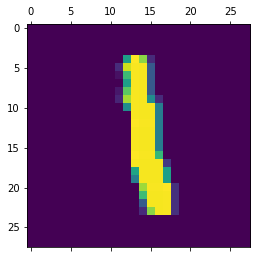

In [10]:
plt.matshow(x_train[6])

In [11]:
y_train[6]

1

In [12]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

In [13]:
x_train.shape

(60000, 28, 28)

In [14]:
x_train = x_train/255
x_test = x_test/255

In [15]:
x_test[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [16]:
##flattening the data set
x_train_flattened = x_train.reshape(len(x_train),28*28)
x_test_flattened = x_test.reshape(len(x_test),28*28)

In [17]:
x_train_flattened.shape

(60000, 784)

In [18]:
x_test_flattened.shape

(10000, 784)

In [20]:
##

model= keras.Sequential([
   keras.layers.Dense(100,input_shape = (784,),activation = 'relu'),
   keras.layers.Dense(10,input_shape = (784,),activation = 'sigmoid') 
])

## modeloptimizer
model.compile(
   optimizer='adam',
   loss = 'sparse_categorical_crossentropy',
   metrics = ['accuracy']
    
)

model.fit(x_train_flattened,y_train,epochs =5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2725 - accuracy: 0.9219
Epoch 2/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1213 - accuracy: 0.9643
Epoch 3/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0839 - accuracy: 0.9747
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0630 - accuracy: 0.9808
Epoch 5/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0507 - accuracy: 0.9846


In [21]:
model.evaluate(x_test_flattened,y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0768 - accuracy: 0.9764


[0.07675667852163315, 0.9764000177383423]

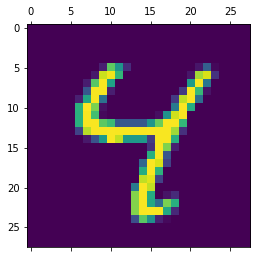

In [26]:
plt.matshow(x_test[6])

In [27]:
y_predicted = model.predict(x_test_flattened)
y_predicted[6]

array([6.7898636e-06, 7.2744489e-03, 3.9276779e-03, 1.1873841e-03,
       9.9991423e-01, 1.4272541e-02, 9.3469322e-03, 3.6601275e-02,
       7.6141107e-01, 8.2400894e-01], dtype=float32)

In [28]:
np.argmax(y_predicted[6])

4